<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">


# Procesamiento de lenguaje natural
## Bert Sentiment Analysis


Consigna en Slack para el desafío 5 (cohorte 12Co2023):

Dejo planteado el último desafío de código: la idea es que entrenen un modelo de clasificación de sentiment analysis para un dataset de reviews de apps utilizando BERT como encoder.
Basen su trabajo en el siguiente notebook que ya incluye el dataset de apps y una propuesta de modelo que fue la que vimos la última clase:
https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/procesamiento_lenguaje_natural/blob/main/clase_7/jupyter_notebooks/tensorflow/7d%20-%20bert%20sentiment%20analysis%20multicategorial.ipynb



*   **CONSIGNA 0**:

 Intenten hacer un primer entrenamiento con el código que ya está, como para comprobar que lo pueden ejecutar y que lo entienden. Lleguen sólo hasta la parte que dice "3-BERT Fine tuning", ahí se propone hacer fine tuning de todo BERT, lo cual les va a llevar muchísimo tiempo, así que no es requisito correr la notebook a partir de ahí.


 *   **CONSIGNA 1**:

 Reporten el F1-score en un conjunto de datos de prueba.


 *   **CONSIGNA 2**:

 En el notebook está planteado un balance de datos con 3 clases a partir de las 5 clases originales. Intenten entrenar un modelo con las 5 clases originales.


 *   **CONSIGNA 3**:

 En el notebook está planteado que luego de BERT viene la capa de salida softmax. Intenten agregar una capa densa previa antes antes de la de salida.



In [11]:
!pip install tensorflow==2.15.1  #2.12.0 # https://github.com/huggingface/transformers/issues/29470#issuecomment-2004669845

#!pip install transformers --quiet
!pip install transformers==4.32.0 # 4.37.2 (https://github.com/huggingface/transformers/issues/29470#issuecomment-1982660313)

# import os #(https://github.com/huggingface/transformers/issues/29470#issuecomment-1982660313)
# os.environ['TF_USE_LEGACY_KERAS'] = '1' #(https://github.com/huggingface/transformers/issues/29470#issuecomment-1982660313)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 973.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tenso

In [2]:
import tensorflow
from transformers import TFBertModel
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [3]:
from tensorflow.keras.utils import to_categorical

In [4]:
from sklearn.metrics import f1_score

In [1]:
!pip show tensorflow
!pip show transformers

Name: tensorflow
Version: 2.15.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl, tf_keras
Name: transformers
Version: 4.32.0
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache 2.0 License
Location: /usr/local/lib/python3.10

In [5]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue May  7 21:28:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Consigna 0: probar el script original

### Definiendo modelo

In [7]:
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture

In [8]:
max_length = 140
output_shape = 3

In [9]:
#NO FUNCIONÓ HACER ESTO #from tensorflow.python.framework.ops import disable_eager_execution ## CAMBIO1. El siguiente código a veces da error, enconces encontré esta solcuion en internet (https://github.com/keras-team/keras/issues/16066#issuecomment-1498773372)
#NO FUNCIONÓ HACER ESTO #disable_eager_execution() ## CAMBIO1. El siguiente código a veces da error, enconces encontré esta solcuion en internet (https://github.com/keras-team/keras/issues/16066#issuecomment-1498773372)
#NO FUNCIONÓ HACER ESTO #!pip install -q transformers==4.31.0  ## CAMBIO2. El siguiente código a veces da error, enconces encontré esta solcuion en internet (https://note.com/jniimi/n/nbe18dce01416)
# SÍ FUNCIONÓ: instalar versiones especificas de tensorflow y de transformers (ver versiones en el inicio del notebook)

bert_model.bert.trainable = False

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')

outputs = bert_model(input_ids, attention_mask=attention_mask)

pooled_output = outputs.pooler_output

x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

model = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])

In [10]:
# # Guardar el modelo
# model.save('/content/drive/MyDrive/Colab Notebooks/NLP_TP/Desafio5/def_model1_bert')

# Cargar el modelo
model = tensorflow.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/NLP_TP/Desafio5/def_model1_bert')

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 140, 7                                       

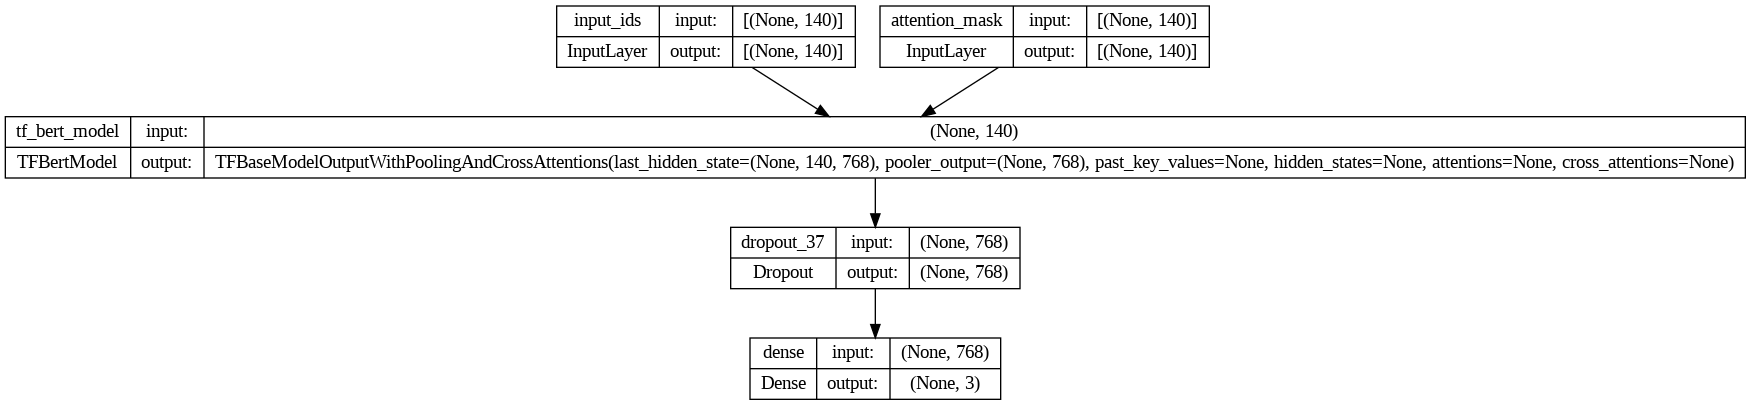

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
def plot_train_metrics(history):
    epoch_count = range(1, len(history.history['accuracy']) + 1)
    sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
    sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
    plt.show()

### Datos
Utilizaremos como dataset críticas de Google Apps en formato csv.

In [120]:
# Descargar la carpeta de dataset
!curl -L -o 'apps.csv' 'https://drive.google.com/u/0/uc?id=1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV&export=download&confirm=t'
!curl -L -o 'reviews.csv' 'https://drive.google.com/u/0/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv&export=download&confirm=t'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  131k  100  131k    0     0   173k      0 --:--:-- --:--:-- --:--:--  173k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 7002k  100 7002k    0     0   297k      0  0:00:23  0:00:23 --:--:-- 1668k


In [121]:
import pandas as pd
# Armar el dataset
df = pd.read_csv('reviews.csv')
df.head()

# df[df['score'] == 5].head()


,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


In [14]:
print("Cantidad de críticas:", len(df))

Cantidad de críticas: 15746


<Axes: xlabel='score', ylabel='count'>

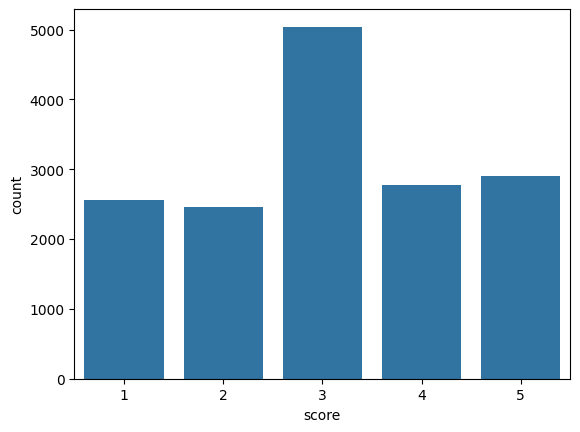

In [15]:
# ¿Cómo están balanceados los datos?
sns.countplot(x=df.score)

## Limpieza de datos

In [122]:
# Balancear los datos
df['sentiment'] = df.score.apply(lambda x: 0 if x <=2 else 1 if x == 3 else 2)
class_names = ['negative', 'neutral', 'positive']

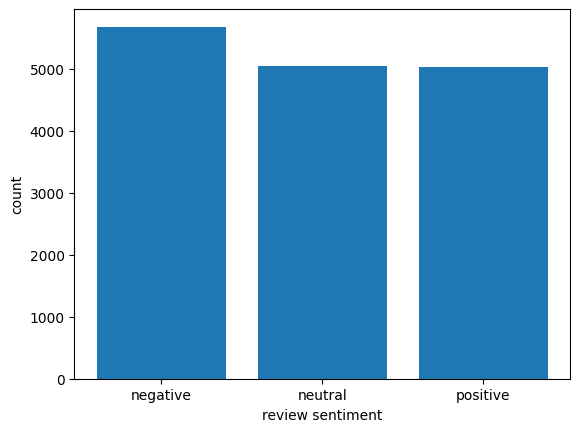

In [123]:
# Gráfico con nuevas categorías
counts = df['sentiment'].value_counts() # Contar las ocurrencias de cada categoría de sentimiento
labels = counts.index# Obtener las etiquetas  eje y
values = counts.values # Obtener los valores del eje y
plt.bar(class_names, values) # Crear el gráfico de barras verticales
plt.xlabel('review sentiment') # Establecer las etiquetas de los ejes
plt.ylabel('count') # Establecer las etiquetas de los ejes
plt.show()

In [18]:
sentences = df['content'].values
print("sentences shape:", sentences.shape)
sentences[:3]

sentences shape: (15746,)


array(["Update: After getting a response from the developer I would change my rating to 0 stars if possible. These guys hide behind confusing and opaque terms and refuse to budge at all. I'm so annoyed that my money has been lost to them! Really terrible customer experience. Original: Be very careful when signing up for a free trial of this app. If you happen to go over they automatically charge you for a full years subscription and refuse to refund. Terrible customer experience and the app is just OK.",
       'Used it for a fair amount of time without any problems. Suddenly then asked me to create an account or log using Google or FB. I used my Google one only to discover everything was gone!',
       "Your app sucks now!!!!! Used to be good but now doesn't update until I physically open it up and then close it then scroll and then it finally shows what I want to put on the list!!!!!! And I FRIGGEN paid for this garbage!!!!!!!"],
      dtype=object)

Median: 139.0


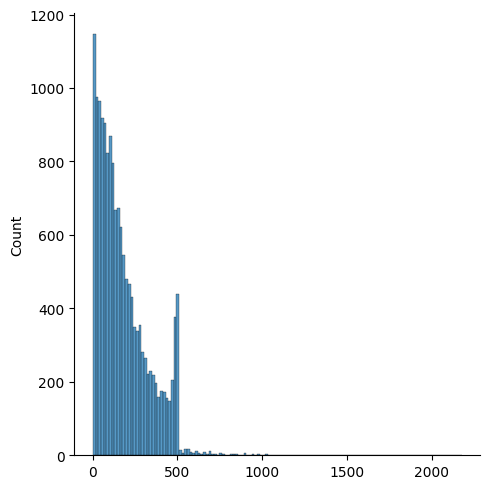

In [19]:
sentence_lens = []

for sentence in sentences:
  sentence_lens.append(len(sentence))

print("Median:", np.median(sentence_lens))
sns.displot(sentence_lens)

In [124]:
y = df['sentiment'].values
print("y shape:", y.shape)
y = to_categorical(y) #Convierte las etiquetas de sentimiento a codificación one-hot
print(y[:-5])
output_shape = y.shape[1]
print("output shape:", output_shape)

y shape: (15746,)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
output shape: 3


## 1 - Data generator


In [21]:
from transformers import InputExample, InputFeatures  # Métodos para transformar el dataset
from transformers import BertTokenizer
import numpy as np

In [125]:
# Muy importante que para tensorflow los modelos Bert deben empezar con "TF"
# de lo contrario estaremos utilizando un modelo para pytorch

# Descargamos el modelo base de BERT más liviano y su correspondiente tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [126]:
# Del dataset original accederemos a los datos por índices (idx)
# mezclados aleatoriamente
from sklearn.model_selection import train_test_split
max_length = 140 # BERT soporta máximo 512
indices = np.arange(len(sentences))
idx_train_val, idx_test = train_test_split(indices, test_size=0.2, random_state=42)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.2, random_state=42)

In [127]:
print(idx_train.shape[0], idx_val.shape[0], idx_test.shape[0])

10076 2520 3150


In [25]:

def convert_data_to_examples(text, labels, idx_train, idx_val):
    # Armamos un "InputExample" para los datos de entrenamiento y validación
    train_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_train]

    validation_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_val]

    return train_InputExamples, validation_InputExamples


def convert_examples_to_tf_dataset(examples, bert_tokenizer, max_length=512):
    # Transformamos los datos de entrada en tensorres de:
    # input_ids --> token id
    # attention_mask
    # token type
    features = []

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = bert_tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=False,
            return_attention_mask=True,
            padding='max_length', # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, attention_mask = (input_dict["input_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, label=e.label
            )
        )

    def gen():
    # Función generadora para no levantar todos los datos en un instante
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                },
                f.label,
            )

    return tensorflow.data.Dataset.from_generator(
        # Tensorflow dataset generator (basado en el generador y en el esquema de datos definido)
        gen,
        ({"input_ids": tensorflow.int32, "attention_mask": tensorflow.int32}, tensorflow.float32),
        (
            {
                "input_ids": tensorflow.TensorShape([None]),
                "attention_mask": tensorflow.TensorShape([None]),
            },
            tensorflow.TensorShape([output_shape]),
        ),
    )

In [128]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length)
# shuffle 100 --> mezcla los datos y los lee a de 100 unidades
# batch 32 --> ejecuta una epoca de entrenamiento de a 32 unidades
train_data = train_data.shuffle(100).batch(32)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length)
validation_data = validation_data.batch(32)

In [129]:
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

In [130]:
X_test = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

In [131]:
y_test = y[idx_test]

## 2 - BERT multiclass classification

In [110]:
## entrenar o cargar el modelo ya entrenado

## Entrenar y guardar el modelo
#history1 = model.fit(train_data, epochs=5, validation_data=validation_data)
#model.save_weights('/content/drive/MyDrive/Colab Notebooks/NLP_TP/Desafio5/model1_bert_weights.h5')


# # Cargar
model.load_weights('/content/drive/MyDrive/Colab Notebooks/NLP_TP/Desafio5/model1_bert_weights.h5')

In [31]:
import pickle

# # GUARDO los resultados del entrenamiento por si hacen falta en algún momento
# # Define la ruta donde deseas guardar el archivo
# file_path = '/content/drive/MyDrive/Colab Notebooks/NLP_TP/Desafio5/training_history1.pickle'
# # Guarda el objeto history1 en el archivo especificado
# with open(file_path, 'wb') as file:
#     pickle.dump(history1.history, file)

# CARGO los resultados del entrenamiento
# ruta del archivo donde se guardaron los resultados del entrenamiento
file_path = '/content/drive/MyDrive/Colab Notebooks/NLP_TP/Desafio5/training_history1.pickle'
with open(file_path, 'rb') as file:
    loaded_history = pickle.load(file)
    print(loaded_history)



{'loss': [1.120105266571045, 1.042449951171875, 1.001436710357666, 0.9786820411682129, 0.9579994082450867], 'accuracy': [0.3959904611110687, 0.45712584257125854, 0.49612942337989807, 0.5130012035369873, 0.5273918509483337], 'f1_score': [0.39075446128845215, 0.44904598593711853, 0.4865187704563141, 0.5029007792472839, 0.5168638825416565], 'val_loss': [1.0322219133377075, 0.9690760970115662, 0.952290952205658, 0.9207221865653992, 0.9013922810554504], 'val_accuracy': [0.511904776096344, 0.507539689540863, 0.5285714268684387, 0.5523809790611267, 0.5611110925674438], 'val_f1_score': [0.41339826583862305, 0.47427114844322205, 0.44969797134399414, 0.4891337454319, 0.5266379714012146]}


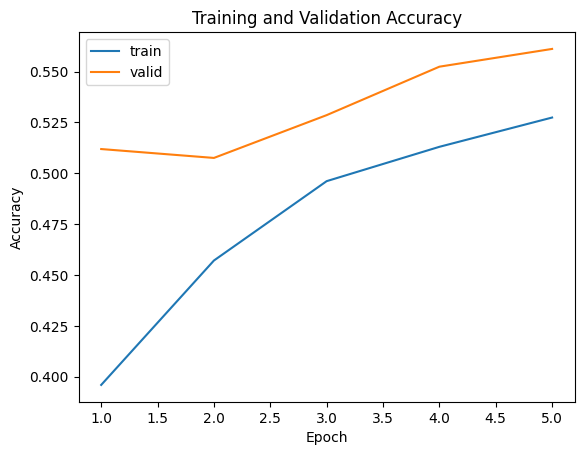

In [32]:
#plot_train_metrics(loaded_history)

import seaborn as sns
import matplotlib.pyplot as plt

def plot_train_metrics(history):
    epoch_count = range(1, len(history['accuracy']) + 1)
    sns.lineplot(x=epoch_count,  y=history['accuracy'], label='train')
    sns.lineplot(x=epoch_count,  y=history['val_accuracy'], label='valid')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

plot_train_metrics(loaded_history)


In [33]:
#y_hat_prob = model.predict(X_test)

# Guardar y_hat_prob en un archivo
file_path = '/content/drive/MyDrive/Colab Notebooks/NLP_TP/Desafio5/y_hat_prob_history1.pickle'

#with open(file_path, 'wb') as file:
#   pickle.dump(y_hat_prob, file)

# Cargar y_hat_prob desde el archivo
with open(file_path, 'rb') as file:
    y_hat_prob = pickle.load(file)

In [34]:
y_hat = np.argmax(y_hat_prob, axis=1)
y_hat

array([0, 0, 1, ..., 2, 1, 2])

In [35]:
# Calcular la exactitud (accuracy)
#scores = model.evaluate(X_test, y_test)


file_path = '/content/drive/MyDrive/Colab Notebooks/NLP_TP/Desafio5/scores_model1.pickle'

# Guardar scores en un archivo
# with open(file_path, 'wb') as file:
#   pickle.dump(y_hat_prob, file)

# Cargar scores desde el archivo
with open(file_path, 'rb') as file:
    scores = pickle.load(file)

scores[1]

array([0.5067968 , 0.2983931 , 0.19481009], dtype=float32)

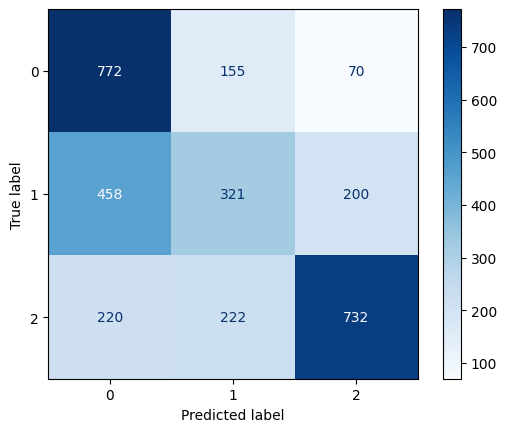

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(3))) ### CAMBIO ## cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

## Levantar el modelo

In [ ]:
# bert_model = TFBertModel.from_pretrained("bert-base-uncased")

# input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')

# # attention_mask - is a binary mask which tells BERT which tokens to attend and which not to attend.
# # Encoder will add the 0 tokens to the some sequence which smaller than MAX_SEQUENCE_LENGTH,
# # and attention_mask, in this case, tells BERT where is the token from the original data and where is 0 pad token:
# attention_mask = tensorflow.keras.layers.Input((max_length,), dtype=tensorflow.int32, name='attention_mask')

# # Get the pooled_output (embedding que representa toda la entrada)
# output = bert_model([input_ids, attention_mask])[1]

# # We can also add dropout as regularization technique:
# output = tensorflow.keras.layers.Dropout(rate=0.2)(output)

# # Se puede agregar más capas Densas en el medio si se desea

# # Provide number of classes to the final layer:
# output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(output)

# # Final model:
# model = tensorflow.keras.models.Model(inputs=[input_ids, attention_mask], outputs=output)

## Ensayo

In [37]:
text = "I love this app!"

In [38]:


#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids'])
print("Attention mask:", tf_batch['attention_mask'])

Inputs ids: tf.Tensor(
[[  101  1045  2293  2023 10439   999   102     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]], shape=(1, 140), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2418: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [39]:
X_ensayo = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

In [40]:
y_prob_ensayo = model.predict(X_ensayo)
y_prob = np.argmax(y_prob_ensayo, axis=1)


1/1 [==============================] - 9s 9s/step


In [41]:
print("Clasificación:", class_names[int(y_prob)])

Clasificación: positive


## Conclusiones

[Nota del script original] Se puede apreciar que luego de realizar el fine tuning el modelo se ajusta mucho mejor al problema. Existen diferentes formas de llevar a cabo este proceso, es importante que el learning rate sea mucho menor.\
Existen optimizadores pensados para fine tuning que realizan el ajuste de learning rate adaptativo a medida que se va entrenando capas más profundas del modelo.

# Consigna 1: Reportar F1-Score para el conjunto de prueba

In [42]:
print("y_test (OHE): ", y_test)
y_test_cat = np.argmax(y_test, axis=1)
print("y_test (etiqueta categoria): ", y_test_cat)

y_test (OHE):  [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
y_test (etiqueta categoria):  [0 0 0 ... 1 2 2]


In [43]:
print("y_hat (probabilidades por categoría): ", y_hat_prob)
# Convertir las probabilidades en etiquetas de clase
y_pred = np.argmax(y_hat_prob, axis=1)
print("y_pred: ", y_pred)

y_hat (probabilidades por categoría):  [[0.5743147  0.3257499  0.09993546]
 [0.5067968  0.2983931  0.19481009]
 [0.2945608  0.40077052 0.30466866]
 ...
 [0.2073996  0.38389155 0.4087088 ]
 [0.25847203 0.5293553  0.21217275]
 [0.05760992 0.13986164 0.80252844]]
y_pred:  [0 0 1 ... 2 1 2]


In [44]:
# Calcular el F1-score
f1score = f1_score(y_test_cat, y_pred, average='weighted')

print("F1-score en el conjunto de datos de prueba:", f1score)

F1-score en el conjunto de datos de prueba: 0.5694384730243947


## Conclusion sobre la resolución de la consigna 1

El modelo tiene un rendimiento medio en el conjunto de datos de prueba:

F1-score en el conjunto de datos de prueba: 0.5694384730243947

# Consigna 2: Entrar el modeloo con las 5 clases originales

## Definiendo modelo

In [45]:
max_length = 140
output_shape = 5

In [46]:
bert_model.bert.trainable = False

In [47]:
input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')

print(input_ids)
print(attention_mask)

KerasTensor(type_spec=TensorSpec(shape=(None, 140), dtype=tf.int32, name='input_ids'), name='input_ids', description="created by layer 'input_ids'")
KerasTensor(type_spec=TensorSpec(shape=(None, 140), dtype=tf.int32, name='attention_mask'), name='attention_mask', description="created by layer 'attention_mask'")


In [48]:
outputs = bert_model(input_ids, attention_mask=attention_mask)


In [49]:

pooled_output = outputs.pooler_output

x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

model = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])



In [50]:
# # Guardar el modelo
# model.save('/content/drive/MyDrive/Colab Notebooks/NLP_TP/Desafio5/def_model2_bert')

# Cargar el modelo
model = tensorflow.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/NLP_TP/Desafio5/def_model2_bert')

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 140, 7                                     

## Limpieza de datos


In [51]:
sentences = df['content'].values
print("sentences shape:", sentences.shape)
sentences[:3]

sentences shape: (15746,)


array(["Update: After getting a response from the developer I would change my rating to 0 stars if possible. These guys hide behind confusing and opaque terms and refuse to budge at all. I'm so annoyed that my money has been lost to them! Really terrible customer experience. Original: Be very careful when signing up for a free trial of this app. If you happen to go over they automatically charge you for a full years subscription and refuse to refund. Terrible customer experience and the app is just OK.",
       'Used it for a fair amount of time without any problems. Suddenly then asked me to create an account or log using Google or FB. I used my Google one only to discover everything was gone!',
       "Your app sucks now!!!!! Used to be good but now doesn't update until I physically open it up and then close it then scroll and then it finally shows what I want to put on the list!!!!!! And I FRIGGEN paid for this garbage!!!!!!!"],
      dtype=object)

In [52]:
# Contar la cantidad de registros para cada valor único en la columna 'score'
print(df['score'].value_counts())


score
3    5042
5    2900
4    2776
1    2566
2    2462
Name: count, dtype: int64


In [53]:
df['sentiment'] = df.score - 1 # resto el uno porque sino me hace problema al hacer el one hot encoding (queda de tamaño 6 en lugar de 5)
# Categorias
df['sentiment'].unique()

array([0, 1, 2, 3, 4])

Median: 139.0
y shape: (15746,)
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]
output shape: 5


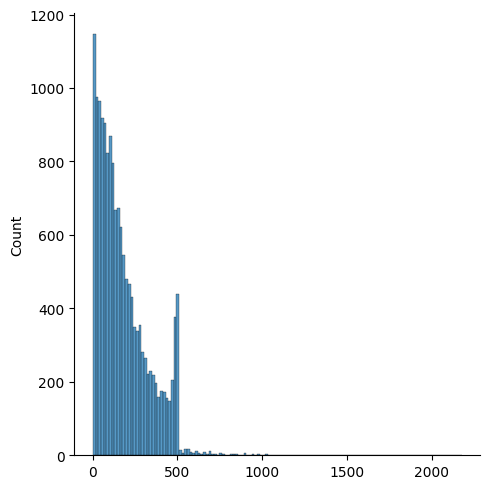

In [54]:
sentence_lens = []

for sentence in sentences:
  sentence_lens.append(len(sentence))

print("Median:", np.median(sentence_lens))
sns.displot(sentence_lens)

#----------------------------------------------------

y = df['sentiment'].values
print("y shape:", y.shape)
y = to_categorical(y, num_classes=5)  #Convierte las etiquetas de sentimiento a codificación one-hot
print(y[:-5])
output_shape = y.shape[1]
print("output shape:", output_shape)


## 1 - Data generator

In [55]:

train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length)
# shuffle 100 --> mezcla los datos y los lee a de 100 unidades
# batch 32 --> ejecuta una epoca de entrenamiento de a 32 unidades
train_data = train_data.shuffle(100).batch(32)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length)
validation_data = validation_data.batch(32)

#----------------------------------------------------

pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

#----------------------------------------------------

X_test = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

#----------------------------------------------------

y_test = y[idx_test]



In [56]:
print("y_test: ", y_test)

y_test:  [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]


## 2 - BERT multiclass classification

In [57]:
## entrenar o cargar el modelo ya entrenado

## elijo entrenar:
#history2 = model.fit(train_data, epochs=5, validation_data=validation_data)

# elijo cargar:
model.load_weights('/content/drive/MyDrive/Colab Notebooks/NLP_TP/Desafio5/model2_bert_weights.h5')


In [58]:
import pickle

In [59]:
# # # GUARDO los resultados del entrenamiento por si hacen falta en algún momento
# # # Define la ruta donde deseas guardar el archivo
# file_path = '/content/drive/MyDrive/Colab Notebooks/NLP_TP/Desafio5/training_history2.pickle'
# # Guarda el objeto history1 en el archivo especificado
# with open(file_path, 'wb') as file:
#     pickle.dump(history2.history, file)

# CARGO los resultados del entrenamiento
# ruta del archivo donde se guardaron los resultados del entrenamiento
file_path = '/content/drive/MyDrive/Colab Notebooks/NLP_TP/Desafio5/training_history2.pickle'
with open(file_path, 'rb') as file:
    loaded_history = pickle.load(file)
    print(loaded_history)



{'loss': [1.6216834783554077, 1.5269547700881958, 1.477394938468933, 1.455134391784668, 1.4275996685028076], 'accuracy': [0.2871178984642029, 0.3298928141593933, 0.3574831187725067, 0.3687971532344818, 0.3854704201221466], 'f1_score': [0.21425707638263702, 0.26037806272506714, 0.2882130742073059, 0.2965734302997589, 0.3157649040222168], 'val_loss': [1.493173360824585, 1.4367209672927856, 1.4189298152923584, 1.390902042388916, 1.3586971759796143], 'val_accuracy': [0.3857142925262451, 0.41111111640930176, 0.37341269850730896, 0.4257936477661133, 0.44206348061561584], 'val_f1_score': [0.221642404794693, 0.26568013429641724, 0.31445544958114624, 0.3240954279899597, 0.30981287360191345]}


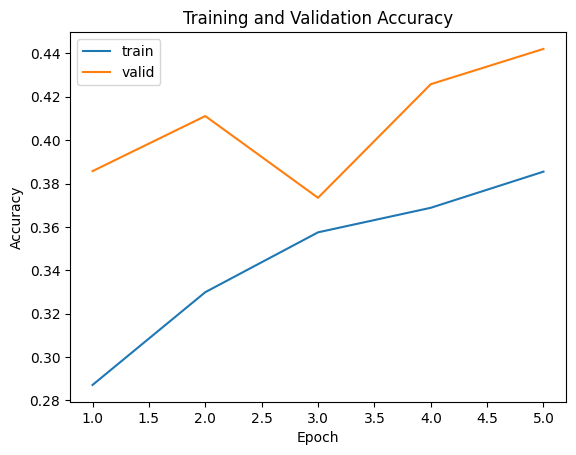

In [60]:
#plot_train_metrics(loaded_history)

import seaborn as sns
import matplotlib.pyplot as plt

def plot_train_metrics(history):
    epoch_count = range(1, len(history['accuracy']) + 1)
    sns.lineplot(x=epoch_count,  y=history['accuracy'], label='train')
    sns.lineplot(x=epoch_count,  y=history['val_accuracy'], label='valid')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()

plot_train_metrics(loaded_history)


In [61]:
y_hat_prob = model.predict(X_test)

# Guardar o cargar y_hat_prob en/desde archivo
file_path = '/content/drive/MyDrive/Colab Notebooks/NLP_TP/Desafio5/y_hat_prob_history2.pickle'

## Elijo Guardar y_hat_prob en un archivo
# with open(file_path, 'wb') as file:
#      pickle.dump(y_hat_prob, file)

# Elijo Cargar y_hat_prob desde el archivo
with open(file_path, 'rb') as file:
   y_hat_prob = pickle.load(file)


99/99 [==============================] - 31s 276ms/step


In [62]:
y_hat_prob

array([[0.30324414, 0.17140457, 0.33326992, 0.10070728, 0.09137413],
       [0.27756754, 0.157095  , 0.28038743, 0.12977934, 0.15517071],
       [0.10718931, 0.12041271, 0.35895333, 0.22054668, 0.19289793],
       ...,
       [0.07228541, 0.09752262, 0.32212782, 0.27393886, 0.23412527],
       [0.1156536 , 0.10993282, 0.46545336, 0.20422567, 0.10473452],
       [0.02883571, 0.02098254, 0.09022261, 0.20295751, 0.6570016 ]],
      dtype=float32)

In [63]:
y_hat = np.argmax(y_hat_prob, axis=1)
y_hat

array([2, 2, 2, ..., 2, 2, 4])

In [64]:
print("Valores únicos de y_hat: ", np.unique(y_hat))
print("Valores únicos de y_test: ", np.unique(y_test))

Valores únicos de y_hat:  [0 2 3 4]
Valores únicos de y_test:  [0. 1.]


In [65]:
# Calcular la exactitud (accuracy)
scores = model.evaluate(X_test, y_test)


file_path = '/content/drive/MyDrive/Colab Notebooks/NLP_TP/Desafio5/scores_model2.pickle'

#Guardar scores en un archivo
# with open(file_path, 'wb') as file:
#    pickle.dump(y_hat_prob, file)

# Cargar scores desde el archivo
with open(file_path, 'rb') as file:
    scores = pickle.load(file)

scores[1]

99/99 [==============================] - 39s 288ms/step - loss: 1.3614 - accuracy: 0.4263 - f1_score: 0.3099


array([0.27756754, 0.157095  , 0.28038743, 0.12977934, 0.15517071],
      dtype=float32)

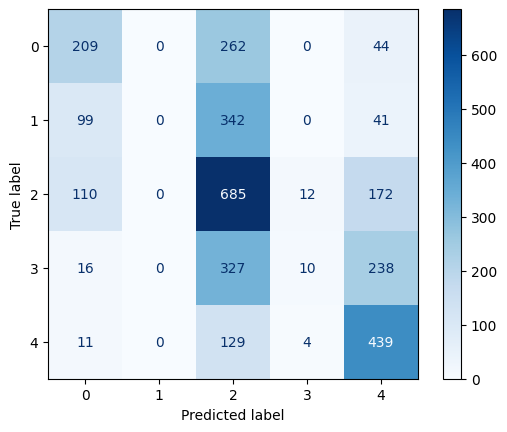

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(5))) ### CAMBIO
cmd.plot(cmap=plt.cm.Blues)
plt.show()


## Ensayo

In [70]:
text = "I love this app!"

In [71]:
#----------------------------------

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids'])
print("Attention mask:", tf_batch['attention_mask'])

#----------------------------------


X_ensayo = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

y_prob_ensayo = model.predict(X_ensayo)
y_prob = np.argmax(y_prob_ensayo, axis=1)

#----------------------------------



Inputs ids: tf.Tensor(
[[  101  1045  2293  2023 10439   999   102     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]], shape=(1, 140), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2418: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [75]:
class_names = [ 'negative' , 'negative to neutral', 'neutral', 'neutral to positive', 'positive']

In [76]:
print("Clasificación:", class_names[int(y_prob)])

Clasificación: positive


## Calcular el F1-score


In [77]:
print("y_test (OHE): ", y_test)
y_test_cat = np.argmax(y_test, axis=1)
print("y_test (etiqueta categoria): ", y_test_cat)

#----------------------------------------------------

print("y_hat (probabilidades por categoría): ", y_hat_prob)
# Convertir las probabilidades en etiquetas de clase
y_pred = np.argmax(y_hat_prob, axis=1)
print("y_pred: ", y_pred)

#----------------------------------------------------


# Calcular el F1-score
f1score = f1_score(y_test_cat, y_pred, average='weighted')

print("F1-score en el conjunto de datos de prueba:", f1score)

y_test (OHE):  [[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]
y_test (etiqueta categoria):  [0 0 1 ... 2 3 3]
y_hat (probabilidades por categoría):  [[0.30324414 0.17140457 0.33326992 0.10070728 0.09137413]
 [0.27756754 0.157095   0.28038743 0.12977934 0.15517071]
 [0.10718931 0.12041271 0.35895333 0.22054668 0.19289793]
 ...
 [0.07228541 0.09752262 0.32212782 0.27393886 0.23412527]
 [0.1156536  0.10993282 0.46545336 0.20422567 0.10473452]
 [0.02883571 0.02098254 0.09022261 0.20295751 0.6570016 ]]
y_pred:  [2 2 2 ... 2 2 4]
F1-score en el conjunto de datos de prueba: 0.34069751126458314


Modelo2 - 5 categorías posibles >>> F1-score en el conjunto de datos de prueba: 0.34069751126458314

## Conclusion sobre la resolución de la consigna 2

El F1-score disminuye considerablemente al usar las 5 categoróas desbalanceadas, respecto de las 3 categorías balanceadas utlizadas en la consigna cero.

# Consigna 3: Agregar una capa densa

## Definiendo modelo

In [157]:
max_length = 140
output_shape = 3

In [158]:
bert_model.bert.trainable = False

In [159]:
# Definir la entrada del modelo
input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')

# Obtener las salidas de BERT
outputs = bert_model(input_ids, attention_mask=attention_mask)
pooled_output = outputs.pooler_output

# Nueva capa densa
new_dense_layer = tensorflow.keras.layers.Dense(64, activation='relu')(pooled_output)

# Capa de dropout
x = tensorflow.keras.layers.Dropout(0.2)(new_dense_layer)

# Capa de salida softmax
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

# Definir el modelo completo
model3 = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

# Compilar el modelo
model3.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy', tensorflow.keras.metrics.F1Score(average='macro')])


In [160]:
# # Guardar el modelo
model3.save('/content/drive/MyDrive/Colab Notebooks/NLP_TP/Desafio5/def_model3_bert')

# Cargar el modelo
#model3 = tensorflow.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/NLP_TP/Desafio5/def_model3_bert')


In [161]:
model3.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 140, 7                                     

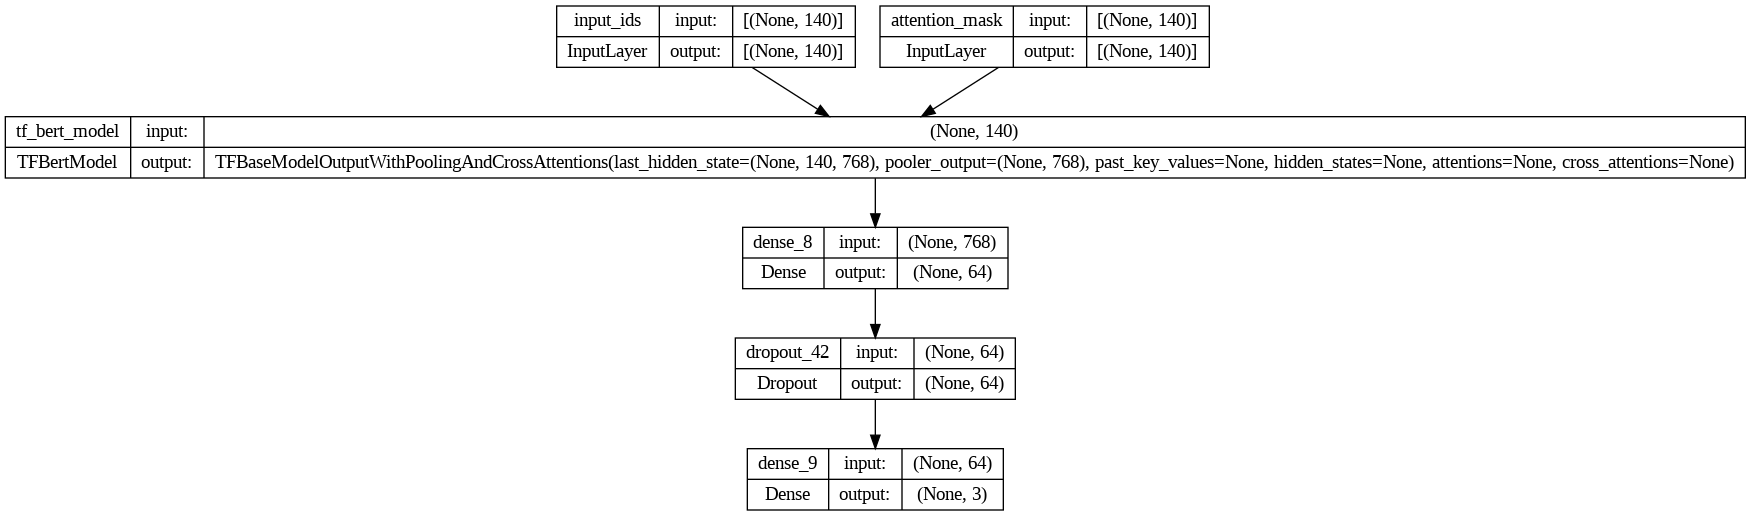

In [162]:
from keras.utils import plot_model
plot_model(model3, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Limpieza de datos

In [87]:
# Balancear los datos
df['sentiment'] = df.score.apply(lambda x: 0 if x <=2 else 1 if x == 3 else 2)
class_names = ['negative', 'neutral', 'positive']


In [88]:
sentences = df['content'].values
print("sentences shape:", sentences.shape)
sentences[:3]


sentences shape: (15746,)


array(["Update: After getting a response from the developer I would change my rating to 0 stars if possible. These guys hide behind confusing and opaque terms and refuse to budge at all. I'm so annoyed that my money has been lost to them! Really terrible customer experience. Original: Be very careful when signing up for a free trial of this app. If you happen to go over they automatically charge you for a full years subscription and refuse to refund. Terrible customer experience and the app is just OK.",
       'Used it for a fair amount of time without any problems. Suddenly then asked me to create an account or log using Google or FB. I used my Google one only to discover everything was gone!',
       "Your app sucks now!!!!! Used to be good but now doesn't update until I physically open it up and then close it then scroll and then it finally shows what I want to put on the list!!!!!! And I FRIGGEN paid for this garbage!!!!!!!"],
      dtype=object)

In [90]:
y = df['sentiment'].values
print("y shape:", y.shape)
y = to_categorical(y) #Convierte las etiquetas de sentimiento a codificación one-hot
print(y[:-5])
output_shape = y.shape[1]
print("output shape:", output_shape)


y shape: (15746,)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
output shape: 3


In [92]:
# Contar la cantidad de registros para cada valor único en la columna 'score'
print(df['sentiment'].value_counts())


sentiment
2    5676
1    5042
0    5028
Name: count, dtype: int64


## 1 - Data generator

In [93]:
# Del dataset original accederemos a los datos por índices (idx)
# mezclados aleatoriamente
from sklearn.model_selection import train_test_split
max_length = 140 # BERT soporta máximo 512
indices = np.arange(len(sentences))
idx_train_val, idx_test = train_test_split(indices, test_size=0.2, random_state=42)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.2, random_state=42)


train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length)
# shuffle 100 --> mezcla los datos y los lee a de 100 unidades
# batch 32 --> ejecuta una epoca de entrenamiento de a 32 unidades
train_data = train_data.shuffle(100).batch(32)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length)
validation_data = validation_data.batch(32)

#----------------------------------------------------

pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

#----------------------------------------------------

X_test = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

#----------------------------------------------------

y_test = y[idx_test]


## 2 - BERT multiclass classification

In [163]:
## entrenar o cargar el modelo ya entrenado

 # Entrenar y guardar el modelo
history3 = model3.fit(train_data, epochs=5, validation_data=validation_data)
model3.save_weights('/content/drive/MyDrive/Colab Notebooks/NLP_TP/Desafio5/model3_bert_weights.h5')

## elijo cargar:
#model.load_weights('/content/drive/MyDrive/Colab Notebooks/NLP_TP/Desafio5/model3_bert_weights.h5')


Epoch 1/5
315/315 [==============================] - 140s 392ms/step - loss: 1.0730 - accuracy: 0.4197 - f1_score: 0.3922 - val_loss: 1.0365 - val_accuracy: 0.4171 - val_f1_score: 0.3080
Epoch 2/5
315/315 [==============================] - 123s 392ms/step - loss: 0.9937 - accuracy: 0.4949 - f1_score: 0.4478 - val_loss: 0.9334 - val_accuracy: 0.5492 - val_f1_score: 0.4447
Epoch 3/5
315/315 [==============================] - 123s 392ms/step - loss: 0.9540 - accuracy: 0.5213 - f1_score: 0.4886 - val_loss: 0.9078 - val_accuracy: 0.5591 - val_f1_score: 0.4932
Epoch 4/5
315/315 [==============================] - 142s 450ms/step - loss: 0.9410 - accuracy: 0.5303 - f1_score: 0.4925 - val_loss: 0.9274 - val_accuracy: 0.5349 - val_f1_score: 0.4969
Epoch 5/5
315/315 [==============================] - 123s 391ms/step - loss: 0.9251 - accuracy: 0.5405 - f1_score: 0.4985 - val_loss: 0.8738 - val_accuracy: 0.5619 - val_f1_score: 0.5296


In [165]:
import pickle

# # GUARDO los resultados del entrenamiento por si hacen falta en algún momento
# # Define la ruta donde deseas guardar el archivo
file_path = '/content/drive/MyDrive/Colab Notebooks/NLP_TP/Desafio5/training_history3.pickle'

 # Guarda el objeto history1 en el archivo especificado
with open(file_path, 'wb') as file:
     pickle.dump(history3.history, file)

# CARGO los resultados del entrenamiento
# ruta del archivo donde se guardaron los resultados del entrenamiento
# file_path = '/content/drive/MyDrive/Colab Notebooks/NLP_TP/Desafio5/training_history3.pickle'
# with open(file_path, 'rb') as file:
#     loaded_history = pickle.load(file)
#     history3 = loaded_history
#     print(loaded_history)


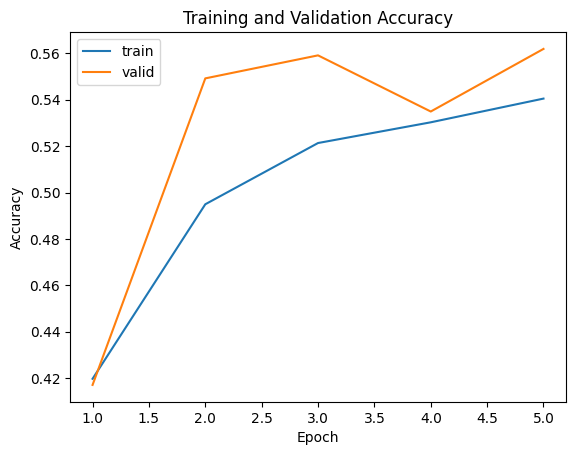

In [166]:
plot_train_metrics(history3.history)

In [167]:
y_hat_prob = model3.predict(X_test)

# Guardar o cargar y_hat_prob en/desde archivo
file_path = '/content/drive/MyDrive/Colab Notebooks/NLP_TP/Desafio5/y_hat_prob_history3.pickle'

# Elijo Guardar y_hat_prob en un archivo
with open(file_path, 'wb') as file:
     pickle.dump(y_hat_prob, file)

# # Elijo Cargar y_hat_prob desde el archivo
# with open(file_path, 'rb') as file:
#    y_hat_prob = pickle.load(file)


99/99 [==============================] - 31s 283ms/step


In [168]:
y_hat = np.argmax(y_hat_prob, axis=1)

In [169]:
# Calcular la exactitud (accuracy)
scores = model3.evaluate(X_test, y_test)

file_path = '/content/drive/MyDrive/Colab Notebooks/NLP_TP/Desafio5/scores_model3.pickle'

# Guardar scores en un archivo
with open(file_path, 'wb') as file:
  pickle.dump(y_hat_prob, file)

# # Cargar scores desde el archivo
# with open(file_path, 'rb') as file:
#     scores = pickle.load(file)

scores[1]


99/99 [==============================] - 32s 288ms/step - loss: 0.8799 - accuracy: 0.5632 - f1_score: 0.5248


0.5631746053695679

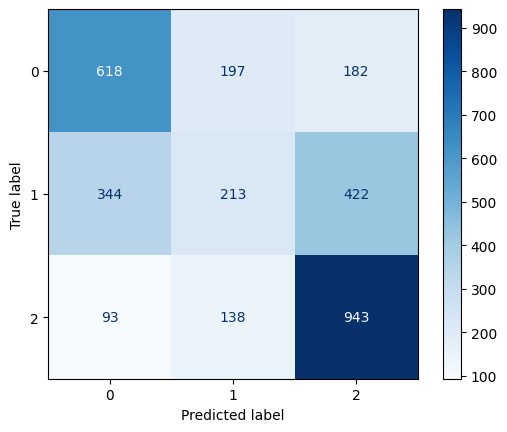

In [170]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(3)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()


## Ensayo

In [171]:
#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids'])
print("Attention mask:", tf_batch['attention_mask'])


Inputs ids: tf.Tensor(
[[  101  1045  2293  2023 10439   999   102     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]], shape=(1, 140), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2418: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [172]:
X_ensayo = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

y_prob_ensayo = model3.predict(X_ensayo)
y_prob = np.argmax(y_prob_ensayo, axis=1)


1/1 [==============================] - 0s 73ms/step


In [173]:
class_names = [ 'negative' , 'neutral', 'positive']

In [174]:
print("Clasificación:", class_names[int(y_prob)])

Clasificación: positive


## Calcular el F1-score

In [175]:
print("y_test (OHE): ", y_test)
y_test_cat = np.argmax(y_test, axis=1)
print("y_test (etiqueta categoria): ", y_test_cat)

#----------------------------------------------------

print("y_hat (probabilidades por categoría): ", y_hat_prob)
# Convertir las probabilidades en etiquetas de clase
y_pred = np.argmax(y_hat_prob, axis=1)
print("y_pred: ", y_pred)

#----------------------------------------------------

# Calcular el F1-score
f1score = f1_score(y_test_cat, y_pred, average='weighted')

print("F1-score en el conjunto de datos de prueba:", f1score)


y_test (OHE):  [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
y_test (etiqueta categoria):  [0 0 0 ... 1 2 2]
y_hat (probabilidades por categoría):  [[0.52811265 0.35839674 0.11349057]
 [0.35305655 0.39982268 0.24712071]
 [0.16707207 0.33052483 0.5024031 ]
 ...
 [0.09154048 0.23517606 0.6732835 ]
 [0.19227819 0.34679142 0.46093047]
 [0.00735399 0.06041759 0.93222845]]
y_pred:  [0 1 2 ... 2 2 2]
F1-score en el conjunto de datos de prueba: 0.5356773723341415


F1-score en el conjunto de datos de prueba: 0.5356773723341415

## Conclusion sobre la resolución de la consigna 3

Se armó un nuevo modelo incorporando una capa densa y el input utilizado es el de las 3 categorías balanceadas.

El modelo original (el de la consigna cero) tiene un F1-score de 0.56 sobre el conjunto de datos de prueba, mienstras que el nuevo modelo se observa un F1-score ligeramente menor (0.536) . Es decir que introducir una capa densa no produce un beneficio significativo.